캐글에서 제공하는 신용카드 거래 데이터

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

참고 블로그

https://slowsteadystat.tistory.com/25

In [42]:

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

import warnings
warnings.filterwarnings(action='ignore')

In [43]:
# 데이터 읽어오기
path = '../datasets/creditcard.csv'
df = pd.read_csv(path)

In [44]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [45]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [46]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: xlabel='Class'>

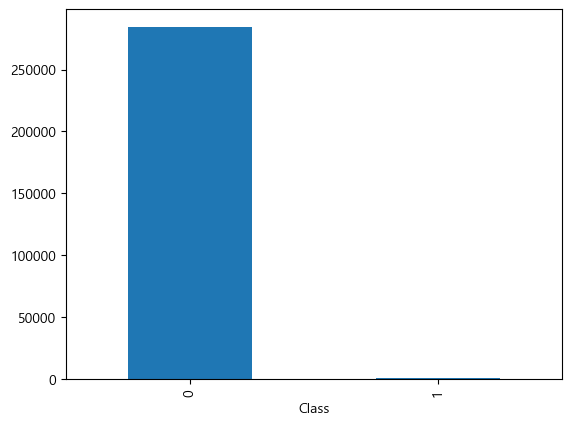

In [47]:
df['Class'].value_counts().plot(kind='bar')

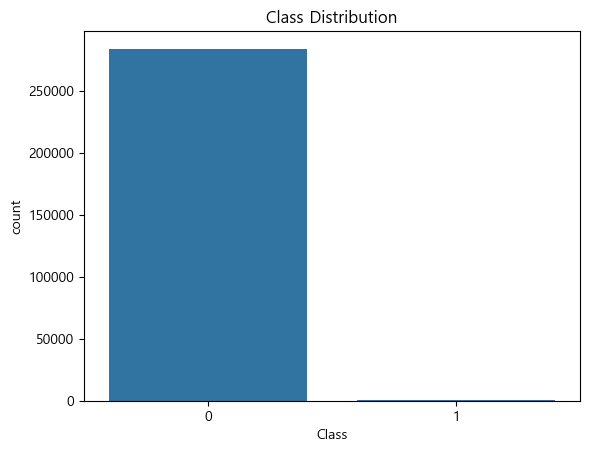

In [48]:
# Plot the class distribution
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

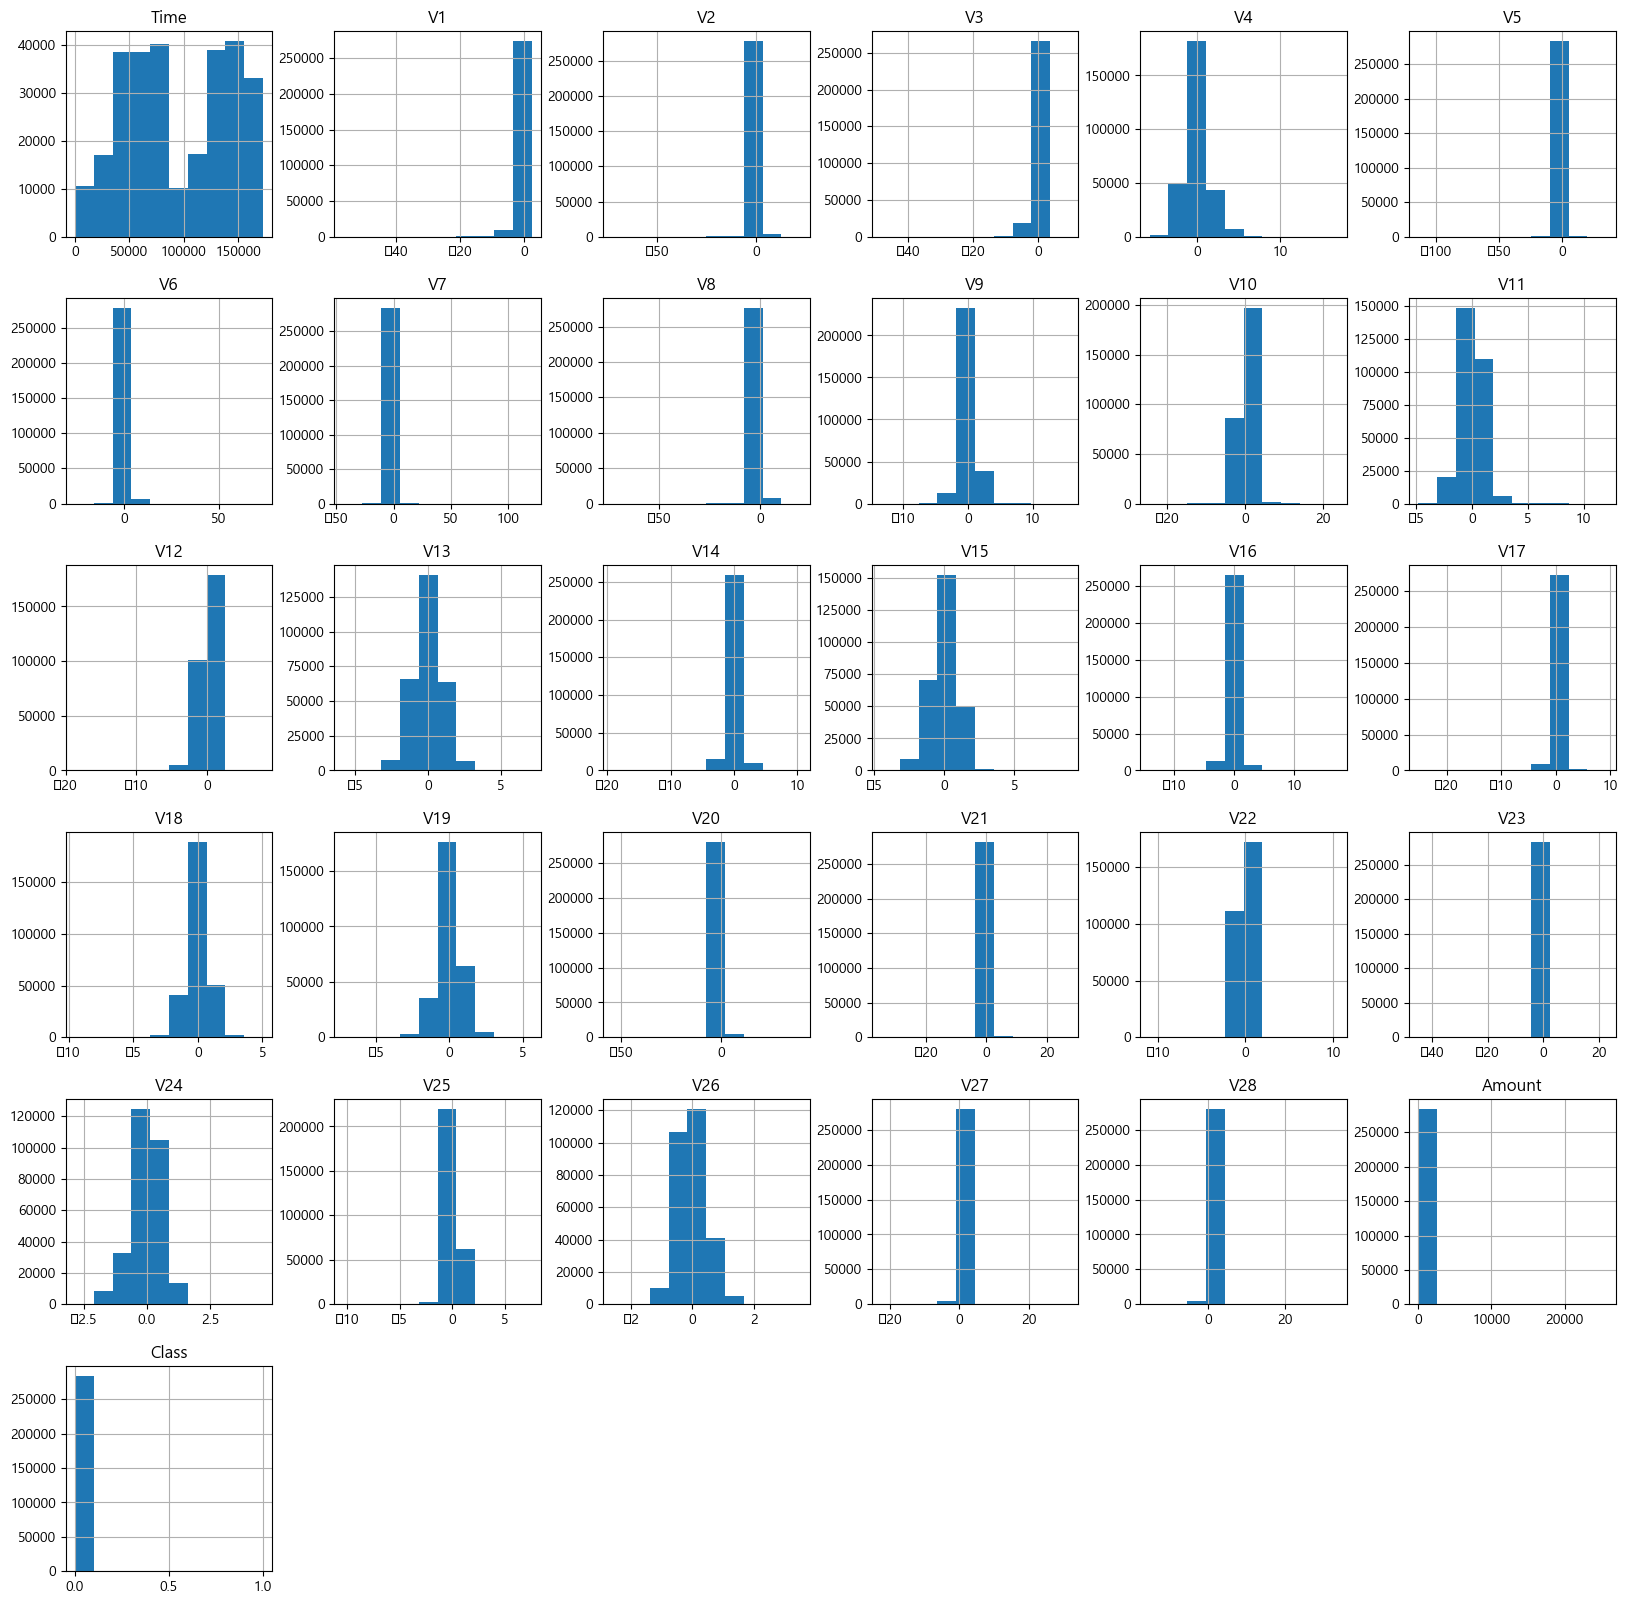

In [49]:
df.hist(bins=10, grid=True, figsize=(20,20))
plt.show()

In [50]:
df['Amount'].value_counts()

Amount
1.00       13688
1.98        6044
0.89        4872
9.99        4747
15.00       3280
           ...  
62.09          1
552.05         1
1467.75        1
196.68         1
95.63          1
Name: count, Length: 32767, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Feature scaling
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

x = df.drop(columns=['Time','Class'])
y = df[['Class']]

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(227845, 29) (56962, 29) (227845, 1) (56962, 1)


In [52]:

import tensorflow as tf
from tensorflow.keras.regularizers import l1, l2
# Build a simple feedforward neural network
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(128, input_dim=X_train.shape[1], activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
                       ])

learning_rate = 0.001  # You can adjust this value based on your needs
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['acc'])

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(X_test, y_test), 
                    verbose=1).history


Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 6s 783us/step - acc: 0.9962 - loss: 0.6550 - val_acc: 0.9983 - val_loss: 0.0267
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 5s 761us/step - acc: 0.9984 - loss: 0.0262 - val_acc: 0.9983 - val_loss: 0.0264
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 5s 765us/step - acc: 0.9983 - loss: 0.0271 - val_acc: 0.9983 - val_loss: 0.0264
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 5s 765us/step - acc: 0.9980 - loss: 0.0286 - val_acc: 0.9983 - val_loss: 0.0263
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 5s 759us/step - acc: 0.9983 - loss: 0.0267 - val_acc: 0.9983 - val_loss: 0.0262
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 5s 767us/step - acc: 0.9982 - loss: 0.0273 - val_acc: 0.9983 - val_loss: 0.0263
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 5s 764us/step - acc: 0.9982 - loss: 0.0270 - val_acc: 0.9983 - val_loss: 0.0264
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 6s 777us/step - acc: 0.9983 - loss: 0.0262 - val_acc: 0.9983 - val_loss: 0.0263
Epoch 9/10
7121/7121 ━━━

In [53]:
# 함수로 만들어서 사용합시다.
def dl_history_plot(history):
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)
    plt.plot(history['loss'], label='loss', marker = '.')
    plt.plot(history['val_loss'], label='val_loss', marker = '.')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    plt.grid()

    plt.subplot(1,2,2)
    plt.plot(history['acc'], label='acc', marker = '.')
    plt.plot(history['val_acc'], label='val_acc', marker = '.')
    plt.ylabel('ACC')
    plt.xlabel('Epochs')
    plt.legend()
    plt.grid()


    plt.show()

from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, f1_score, recall_score, classification_report


def evaluate_model(y_test, y_pred):
    print("Precision Score:", precision_score(y_test, y_pred))
    print("Recall Score:", recall_score(y_test, y_pred))
    print("F1 score:", f1_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


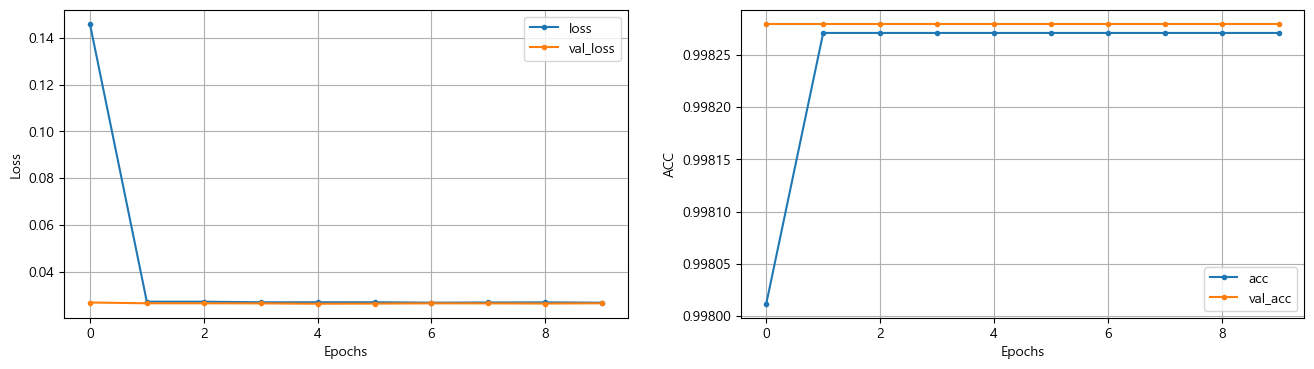

In [54]:
dl_history_plot(history)

In [55]:
import numpy as np 

# pred = model.predict(X_test)
pred = (model.predict(X_test) > 0.5).astype(int)

evaluate_model(y_test, pred)



1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 496us/step
Precision Score: 0.0
Recall Score: 0.0
F1 score: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



Anomaly Detection:

Isolation Forest:

In [56]:
from sklearn.ensemble import IsolationForest
if_model = IsolationForest(contamination=0.02, random_state=42) #contamination = the proportion of outliers in the data set
if_model.fit(X_train)
if_preds = if_model.predict(X_test)
if_preds[if_preds == 1] = 0  # Normal transactions are labeled as 1, so change it to 0
if_preds[if_preds == -1] = 1  # Fraudulent transactions are labeled as -1, so change it to 1
print("Isolation Forest:")
evaluate_model(y_test, if_preds)

Isolation Forest:
Precision Score: 0.05508474576271186
Recall Score: 0.6632653061224489
F1 score: 0.10172143974960876
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.66      0.10        98

    accuracy                           0.98     56962
   macro avg       0.53      0.82      0.55     56962
weighted avg       1.00      0.98      0.99     56962



One-Class SVM (Support Vector Machine):

In [58]:
from sklearn.svm import OneClassSVM
svm_model = OneClassSVM(kernel='rbf', nu=0.01)
svm_model.fit(X_train)
svm_preds = svm_model.predict(X_test)
svm_preds[svm_preds == 1] = 0
svm_preds[svm_preds == -1] = 1
print("\nOne-Class SVM:")
evaluate_model(y_test, svm_preds)